In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [6]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

753

## Perform API Calls
1. Perform a weather check on each city using a series of successive API calls
2. Include a print log of each city as it's being processed (with the city number and city name)

In [7]:
# URL building blocks
base_url = 'http://api.openweathermap.org/data/2.5/weather'
params = {
    'q': '',
    'units': 'imperial',
    'appid': weather_api_key
}

# Blank lists to append to during the for loop
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_found = []

print('Beginnig Data Retrieval')
print('---------------------------')

# For loop to go through each of the cities in the list
for city in cities:
    index = cities.index(city)
    # Updating 'q' in the parameters dictionary for each city in the list
    params['q'] = city
    
    # Obtaining the response for each city in json format using the base url and parameters
    response = requests.get(base_url, params=params).json()
    
    # Saving relevant information from the response (if applicable)
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cities_found.append(response["name"])
        print(f'Processing Record {index} | {city}')
    except: 
        print('City not found. Skipping...')
        pass

print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginnig Data Retrieval
---------------------------
Processing Record 0 | thompson
Processing Record 1 | marsaxlokk
Processing Record 2 | kapaa
Processing Record 3 | qui nhon
City not found. Skipping...
Processing Record 5 | rikitea
Processing Record 6 | iqaluit
Processing Record 7 | banda aceh
City not found. Skipping...
Processing Record 9 | ushuaia
Processing Record 10 | hilo
Processing Record 11 | busselton
Processing Record 12 | san pedro
Processing Record 13 | kjollefjord
Processing Record 14 | hobart
Processing Record 15 | hithadhoo
Processing Record 16 | cayenne
Processing Record 17 | hima
City not found. Skipping...
Processing Record 19 | maumere
City not found. Skipping...
Processing Record 21 | guerrero negro
Processing Record 22 | jamestown
Processing Record 23 | christchurch
Processing Record 24 | saldanha
Processing Record 25 | albany
Processing Record 26 | naze
Processing Record 27 | los llanos de aridane
Processing Record 28 | vanimo
Processing Record 29 | punta arenas


Processing Record 250 | tuatapere
Processing Record 251 | pitimbu
Processing Record 252 | dalbandin
Processing Record 253 | southampton
Processing Record 254 | minsk
Processing Record 255 | talnakh
Processing Record 256 | sao miguel do araguaia
Processing Record 257 | kailua
Processing Record 258 | nagapattinam
Processing Record 259 | mezen
City not found. Skipping...
Processing Record 261 | mstera
Processing Record 262 | sao filipe
Processing Record 263 | lompoc
Processing Record 264 | lerwick
City not found. Skipping...
Processing Record 266 | westerland
Processing Record 267 | rosetta
Processing Record 268 | barsovo
Processing Record 269 | gualeguay
Processing Record 270 | kruisfontein
Processing Record 271 | ossora
Processing Record 272 | suntar
Processing Record 273 | chernyshevskiy
Processing Record 274 | sao miguel
Processing Record 275 | walvis bay
Processing Record 276 | harper
Processing Record 277 | bonavista
Processing Record 278 | felanitx
Processing Record 279 | katsuura


Processing Record 500 | jambalo
Processing Record 501 | anori
Processing Record 502 | povenets
Processing Record 503 | krutinka
Processing Record 504 | reconquista
Processing Record 505 | poum
City not found. Skipping...
Processing Record 507 | juneau
Processing Record 508 | ugoofaaru
Processing Record 509 | morros
Processing Record 510 | broken hill
Processing Record 511 | kungurtug
Processing Record 512 | eirunepe
Processing Record 513 | sambava
Processing Record 514 | chiplun
Processing Record 515 | novyy urengoy
Processing Record 516 | atbasar
Processing Record 517 | atherton
Processing Record 518 | aswan
Processing Record 519 | chicama
Processing Record 520 | chara
Processing Record 521 | constitucion
Processing Record 522 | lac du bonnet
Processing Record 523 | turayf
Processing Record 524 | klaksvik
Processing Record 525 | orlik
Processing Record 526 | severo-kurilsk
Processing Record 527 | xining
Processing Record 528 | kutum
Processing Record 529 | buug
Processing Record 530 |

Processing Record 749 | oktyabrskoye
Processing Record 750 | jacksonville beach
Processing Record 751 | carver
Processing Record 752 | morgan city
---------------------------
Data Retrieval Complete
---------------------------


## Convert Raw Data to DataFrame
Export the data into a .csv and display the DataFrame.

In [8]:
# Turning the lists of weather data into a DataFrame
weather_df = pd.DataFrame({'City': cities_found,
                           'Lat': lat,
                           'Lng': lng,
                           'Max Temp': max_temp,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': wind_speed,
                           'Country': country,
                           'Date': date
})

# Removing duplicate cities, if any
weather_df = weather_df.drop_duplicates(['City'])

# Exporting the DataFrame into a csv
weather_df.to_csv("Output/cities.csv")

In [9]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,37.42,98,100,5.21,CA,1651298566
1,Marsaxlokk,35.8419,14.5431,62.08,88,0,2.30,MT,1651298567
2,Kapaa,22.0752,-159.3190,75.18,83,66,5.01,US,1651298567
3,Qui Nhon,13.7667,109.2333,79.84,84,100,3.74,VN,1651298568
4,Rikitea,-23.1203,-134.9692,76.95,69,100,16.69,PF,1651298569


In [10]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,705.000000,705.00000,705.000000,705.000000,705.000000,705.000000,7.050000e+02
mean,20.434216,19.57852,62.361816,67.765957,57.886525,7.899986,1.651299e+09
std,32.820812,86.41367,19.804809,22.981044,38.626470,5.415875,1.261724e+02
min,-54.800000,-179.16670,-2.400000,1.000000,0.000000,0.000000,1.651298e+09
25%,-6.884400,-55.80000,47.170000,56.000000,17.000000,3.830000,1.651299e+09
50%,23.368700,26.89100,64.980000,73.000000,70.000000,6.850000,1.651299e+09
75%,49.166700,90.66610,77.720000,86.000000,99.000000,10.830000,1.651299e+09
max,78.218600,179.31670,112.010000,100.000000,100.000000,33.220000,1.651299e+09


# Inspect the data and remove the cities where humidity > 100%

In [11]:
# Finding all row indices where Humidity > 100
high_humidity = weather_df[weather_df['Humidity'].astype(int) > 100].index
high_humidity

# No cities have humidity > 100

Int64Index([], dtype='int64')

# Plotting the Data

In [16]:
# Creating a function to plot the data with less code
def scatterplot(y, x=weather_df['Lat']):
    # Building the scatter plot base
    plt.grid(True)
    
    # Determining appropriate y-axis values + adding a title and axis labels
    if y == 'Max Temp':
        y_axis = weather_df['Max Temp']
        plt.title('City Latitude vs. Max Temperature (4/29/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Max Temperature (F)')
    elif y == 'Humidity':
        y_axis = weather_df['Humidity']
        plt.title('City Latitude vs. Humidity (4/29/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Humidity (%)')
    elif y == 'Cloudiness':
        y_axis = weather_df['Cloudiness']
        plt.title('City Latitude vs. Cloudiness (4/29/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Cloudiness (%)')
    elif y == 'Wind Speed':
        y_axis = weather_df['Wind Speed']
        plt.title('City Latitude vs. Wind Speed (4/29/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Wind Speed (mph)')
    
    # Plotting the appropriate data
    plt.scatter(x, y_axis, marker='o')

## Latitude vs. Temperature Plot

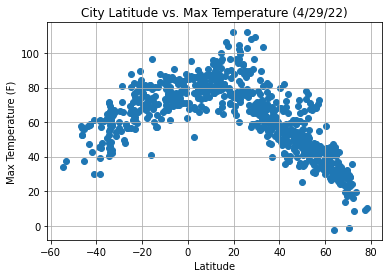

In [17]:
scatterplot('Max Temp')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeMaxTemperature.png")

'City Latitude vs. Max Temperature (4/29/22)' shows the maximum temperature, in Fahrenheit, for each city according to its latitude.

## Latitude vs. Humidity Plot

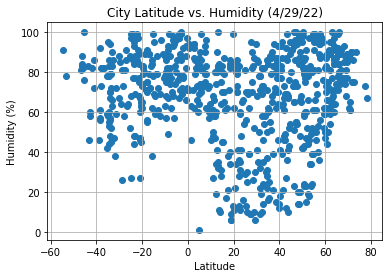

In [18]:
scatterplot('Humidity')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeHumidity.png")

'City Latitude vs. Humidity (4/29/22)' shows the humidity, as a percentage, for each city according to its latitude.

## Latitude vs. Cloudiness Plot

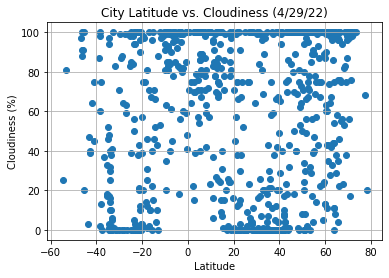

In [19]:
scatterplot('Cloudiness')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeCloudiness.png")

'City Latitude vs. Cloudiness (4/29/22)' shows the cloudiness, as a percentage, for each city according to its latitude.

## Latitude vs. Wind Speed Plot

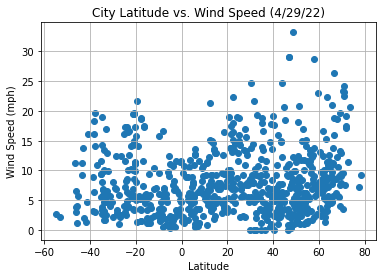

In [20]:
scatterplot('Wind Speed')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeWindSpeed.png")

'City Latitude vs. Wind Speed (4/29/22)' shows the wind speed, in miles per hour, for each city according to its latitude.

# Linear Regression

In [30]:
# Creating a function to plot the data with less code
def regression(x, y):
    # Determining latitude values based on 'Northern' or 'Southern' hemisphere input
    if x == 'Northern':
        new = weather_df.loc[weather_df['Lat'] >= 0]
        x_axis = new['Lat']
        # Annotation x coordinate
        x_annotate = 35
    elif x == 'Southern':
        new = weather_df.loc[weather_df['Lat'] < 0]
        x_axis = new['Lat']
        # Annotation x coordinate
        x_annotate =-35
    
    # Determining appropriate y-axis values + adding a title and axis labels
    if y == 'Max Temp':
        y_axis = new['Max Temp']
        plt.title(f'{x} Latitudes vs. Max Temperature (4/29/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Max Temperature (F)')
        # Annotation y coordinate
        y_annotate = 90
    elif y == 'Humidity':
        y_axis = new['Humidity']
        plt.title(f'{x} Latitudes vs. Humidity (4/29/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Humidity (%)')
        # Annotation y coordinate
        y_annotate = 30
    elif y == 'Cloudiness':
        y_axis = new['Cloudiness']
        plt.title(f'{x} Latitudes vs. Cloudiness (4/29/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Cloudiness (%)')
        # Annotation y coordinate
        y_annotate = 80
    elif y == 'Wind Speed':
        y_axis = new['Wind Speed']
        plt.title(f'{x} Latitudes vs. Wind Speed (4/29/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Wind Speed (mph)')
        # Annotation y coordinate
        y_annotate = 20

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    # Making regression line and annotation label
    regress_values = x_axis*slope + intercept
    line_eq = "y =" + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    print(f'The r-value is: {rvalue**2}')
    
    # Plotting scatter plot and regression line (with annotation)
    plt.scatter(x_axis, y_axis, marker='o')
    plt.plot(x_axis, regress_values,'r-')
    plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color='r')

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.716714864542015


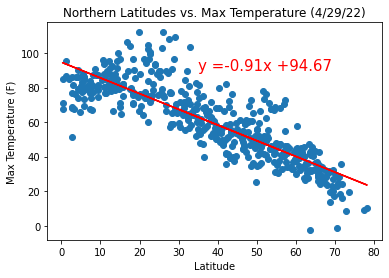

In [22]:
regression('Northern', 'Max Temp')

# Saving the scatterplot as a png
plt.savefig("Output/NorthMaxTemperature.png")

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4854248581163213


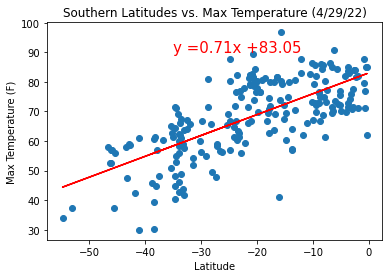

In [23]:
regression('Southern', 'Max Temp')

# Saving the scatterplot as a png
plt.savefig("Output/SouthMaxTemperature.png")

These two plots analyze the relationship between latitudes and maximum temperature, in Fahrenheit, using linear regression. According to the graphs, maximum temperature increases as the latitude approaches 0°. This relationship is more strongly correlated in the northern hemisphere, where the r-value is approximately 0.72 (as opposed to approximately 0.49 in the southern hemisphere). The stronger correlation is visually represented by a tighter adherence to the red regression line.

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03198645204301822


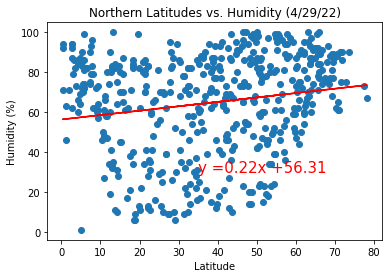

In [24]:
regression('Northern', 'Humidity')

# Saving the scatterplot as a png
plt.savefig("Output/NorthHumidity.png")

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05378982181476452


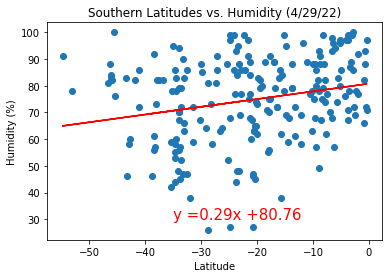

In [25]:
regression('Southern', 'Humidity')

# Saving the scatterplot as a png
plt.savefig("Output/SouthHumidity.png")

These two plots analyze the relationship between latitudes and humidity, as a percentage, using linear regression. The wide spread of the scatter plots suggests a weak linear correlation between the metrics, if any. Both hemispheres have an r-value of around or less than 0.05, proving the very weak correlation. The southern hemisphere appears to have a higher minimum humidity threshold.

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00792055318618744


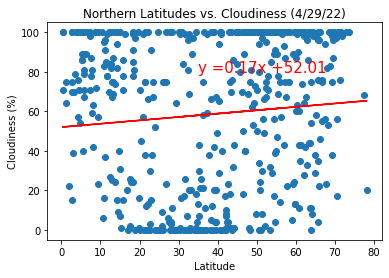

In [26]:
regression('Northern', 'Cloudiness')

# Saving the scatterplot as a png
plt.savefig("Output/NorthCloudiness.png")

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11945440146340668


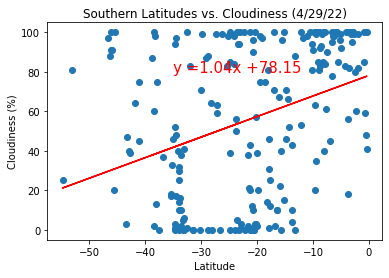

In [27]:
regression('Southern', 'Cloudiness')

# Saving the scatterplot as a png
plt.savefig("Output/SouthCloudiness.png")

These two plots analyze the relationship between latitudes and cloudiness, as a percentage, using linear regression. Each hemisphere displays a very weak linear correlation, with data points more congreagated at the extreme (near 0% and 100%) levels of cloudiness. Their r-values of around 0.1 and below confirm the weak relationship.

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01793598193416876


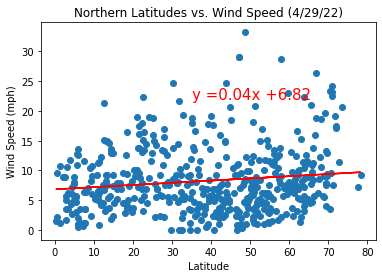

In [28]:
regression('Northern', 'Wind Speed')

# Saving the scatterplot as a png
plt.savefig("Output/NorthWindSpeed.png")

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02590155590802948


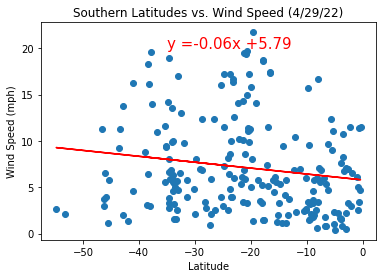

In [31]:
regression('Southern', 'Wind Speed')

# Saving the scatterplot as a png
plt.savefig("Output/SouthWindSpeed.png")

These plots analyze the relationship between latitudes and wind speeds, in miles per hour, using linear regression. Although the southern hemisphere has a higher r-value (rounded up to 0.03) than the northern hemisphere (approximately 0.02), neither hemisphere is representative of even a moderate linear relationship. 